# SIR model on 2 Cities with population Migration

## Parameters

- ### City 1
    -  S_1 Susceptible Individuals
    -  I_1 Infected Individuals
    -  R_1 Recovered Individuals
    -  $N_{1}$ Total Population of City 1
- ### City 2
    -  S_2 Susceptible Individuals
    -  I_2 Infected Individuals
    -  R_2 Recovered Individuals
    -  $N_{2}$ Total Population of City 2
-  $\beta$ Transmission Rate of Infection
-  $\gamma$ Recovery rate 
- $\mu$ Rate of Birth and Death
- $\omega$ Pathogen induced mortality rate
- $\zeta_{1,2}$ Migration rate from  $1 \rightarrow 2$
- $\zeta_{2,1}$ Migration rate from $2 \rightarrow 1$

## Assumptions

- We assume that if a person migrates then, he/she doesnot undergo death or give birth or convert from I2R

## Equations 
### City 1

#### Susceptible 
$$\frac{dS_{1}}{dt}=\mu N_{1} - \mu S_{1} - \beta S_{1} I_{1} -\zeta_{2,1} \beta S_{1} I_{2} + \zeta_{2,1} S_{2} -\zeta_{1,2} S_{1}$$

#### Infected
$$\frac{dI_{1}}{dt}= \beta S_{1} I_{1} -(\mu-\omega)I_{1} - \gamma I_{1} + \zeta_{2,1}I_{2} +\zeta_{2,1} \beta S_{1} I_{2} - \zeta_{1,2} I_{1}$$

#### Recovered
$$\frac{dR_{1}}{dt}= \gamma I_{1} -\mu R_{1} + \zeta_{2,1} R_{2} - \zeta_{1,2} R_{1} $$

### City 2

#### Susceptible 
$$\frac{dS_{2}}{dt}=\mu N_{2} - \mu S_{2} - \beta S_{2} I_{2} -\zeta_{1,2} \beta S_{2} I_{1} + \zeta_{1,2} S_{1} - \zeta_{2,1} S_{2}$$

#### Infected
$$\frac{dI_{2}}{dt}= \beta S_{2} I_{2} -(\mu-\omega)I_{2} - \gamma I_{2} + \zeta_{1,2}I_{1} +\zeta_{1,2} \beta S_{2} I_{1} - \zeta_{2,1} I_{2}$$

#### Recovered
$$\frac{dR_{2}}{dt}= \gamma I_{2} -\mu R_{2} + \zeta_{1,2} R_{1} -\zeta_{2,1} R_{2} $$

### Constraint Equations

$$N_{1}=S_{1}+I_{1}+R_{1},N_{2}=S_{2}+I_{2}+R_{2}$$

$$\frac{dN_{1}}{dt}+\frac{dN_{2}}{dt}= 0$$

$$\frac{dN_{1}}{dt}=\zeta_{2,1} N_{2} - \zeta_{1,2} N_{1}$$

<span style="color:Blue">To do:</span> The Constraint equation is not satisfied $-\omega(I_{1}+I_{2})$ term remains

# Simulating the above the Model

In [1]:
from __future__ import division
import numpy
import random 
import matplotlib.pyplot as plt
%matplotlib inline

## Fill up the parameters required for the simulation 

In [2]:
N1 = 500
N2 = 300
mu = 0.8
beta = 0.3
gamma = 0.03
omega = 0
zeta12 = 0.06
zeta21 = 0.01
tmax = 100

126742


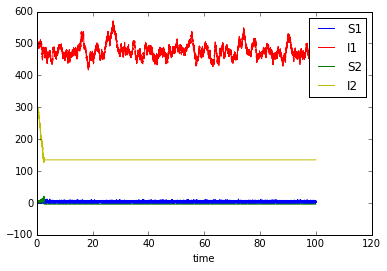

In [3]:
MAX=int(1e6)
TVal=numpy.zeros(MAX,dtype=float)
S1Val=numpy.zeros(MAX,dtype=int)
I1Val=numpy.zeros(MAX,dtype=int)
R1Val=numpy.zeros(MAX,dtype=int)
S2Val=numpy.zeros(MAX,dtype=int)
I2Val=numpy.zeros(MAX,dtype=int)
R2Val=numpy.zeros(MAX,dtype=int)

#------------Initial Values-----------------------
count = 0
t=0

I1    = int(0.3*N1)
R1    = 0
S1    = N1-I1
I2    = 30
R2    = 0
S2    = N2

TVal[count]=t
S1Val[count]=S1
I1Val[count]=I1
R1Val[count]=R1
S2Val[count]=S2
I2Val[count]=I2
R2Val[count]=R2

while count < MAX and t < tmax and I1>=0 and I2>=0:
#-----------City1---------------------------------
    S2I_1 = beta*S1*I1 + zeta21*beta*S1*I2
    I2R_1 = gamma*I1 #+ zeta21*gamma*I2 # note migrated population people also recover
    Birth_1 = mu*N1
    NatI_1 = (mu-omega)*I1#+(mu-omega)*zeta21*gamma*I1
    NatS_1 = mu*S1
    NatR_1 = mu*R1
#------------City 2----------------------------------
    S2I_2 = beta*S2*I2 + zeta12*beta*S2*I1
    I2R_2 = gamma*I2+ zeta12*gamma*I1
    Birth_2 = mu*N2
    NatI_2  = (mu-omega)*I2#+(mu-omega)*zeta21*gamma*I1
    NatS_2  = mu*S2
    NatR_2  = mu*R2
#------------------------------------------------------------------
    
    K=S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1 + S2I_2+I2R_2+Birth_2+NatI_2+NatS_2+NatR_2
    
    dt=-(1.0/K)*numpy.log(random.random())
    
    t = t + dt
    count = count + 1
    
    r= random.random()*K
    
    if r<S2I_1:
        S1 = S1-1
        I1 = I1 +1
    elif r< S2I_1+I2R_1:
        I1 = I1 - 1
        R1 = R1 +1
    elif r< S2I_1+I2R_1+Birth_1:
        S1 = S1 +1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1:
        I1 = I1 -1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1:
        S1 = S1 -1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1:
        R1 = R1 -1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1+S2I_2:
        S2 = S2-1
        I2 = I2 +1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1+S2I_2+S2I_2+I2R_2:
        I2 = I2 - 1
        R2 = R2 +1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1+S2I_2+S2I_2+I2R_2 +S2I_2+I2R_2+Birth_2:
        S2 = S2 +1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1+S2I_2+S2I_2+I2R_2 +S2I_2+I2R_2+Birth_2 +S2I_2+I2R_2+Birth_2+NatI_2:
        I2 = I2 -1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1+S2I_2+S2I_2+I2R_2 +S2I_2+I2R_2+Birth_2 +S2I_2+I2R_2+Birth_2+NatI_2 +S2I_2+I2R_2+Birth_2+NatI_2+NatS_2:
        S2 = S2 -1
    elif r<S2I_1+I2R_1+Birth_1+NatI_1+NatS_1+NatR_1+S2I_2+S2I_2+I2R_2 +S2I_2+I2R_2+Birth_2 +S2I_2+I2R_2+Birth_2+NatI_2 +S2I_2+I2R_2+Birth_2+NatI_2+NatS_2 +S2I_2+I2R_2+Birth_2+NatI_2+NatS_2+NatR_2:
        R2 = R2 -1
    
    TVal[count]=t
    S1Val[count]=S1
    I1Val[count]=I1
    R1Val[count]=R1
    S2Val[count]=S2
    I2Val[count]=I2
    R2Val[count]=R2
print count
TVal=TVal[:count+1]
S1Val=S1Val[:count+1]
I1Val=I1Val[:count+1]
R1Val=R1Val[:count+1]
S2Val=S2Val[:count+1]
I2Val=I2Val[:count+1]
R2Val=R2Val[:count+1]

fig,ax = plt.subplots()
ax.plot(TVal,S1Val,'b-',label='S1')
ax.plot(TVal,I1Val,'r-',label='I1')
ax.plot(TVal,S2Val,'g-',label='S2')
ax.plot(TVal,I2Val,'y-',label='I2')
ax.set_xlabel('time')
ax.legend(loc='best')
plt.show()
    